In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

In [2]:
data_original=pd.read_csv("./Downloads/Train10.csv")

In [3]:
data_original.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data_original.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
data_original["Item_Weight"].fillna(data_original["Item_Weight"].mean(),inplace=True)

In [7]:
data_original.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
data_original["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
data_original["Outlet_Size"].fillna(data_original["Outlet_Size"].mode()[0],inplace=True)

In [18]:
data_original.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
data_original['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [20]:
data_original['New_Item_Type'] = data_original['Item_Identifier'].apply(lambda x: x[:2])

In [22]:
data_original['New_Item_Type'].value_counts()

FD    6125
NC    1599
DR     799
Name: New_Item_Type, dtype: int64

In [33]:
data_original.loc[:, 'Item_Visibility'].replace([0], [data_original['Item_Visibility'].mean()], inplace=True)

In [34]:
data_original['Item_Visibility']==0

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Visibility, Length: 8523, dtype: bool

In [35]:
data_original['Item_Visibility'].value_counts()

0.066132    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [36]:
data_original['Outlet_Years'] = 2024 - data_original['Outlet_Establishment_Year']

In [37]:
data_original['Outlet_Years'].value_counts()

39    1463
37     932
25     930
27     930
20     930
22     929
15     928
17     926
26     555
Name: Outlet_Years, dtype: int64

In [39]:
dist_columns=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']

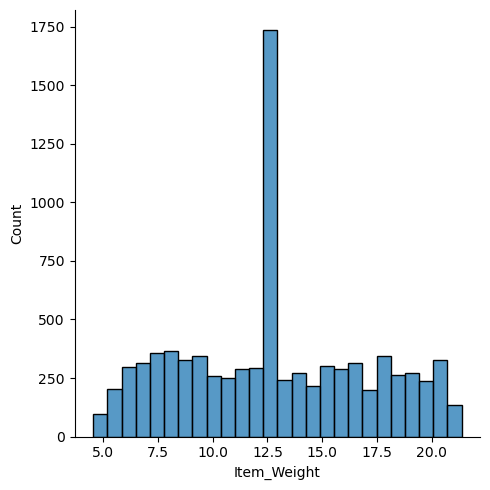

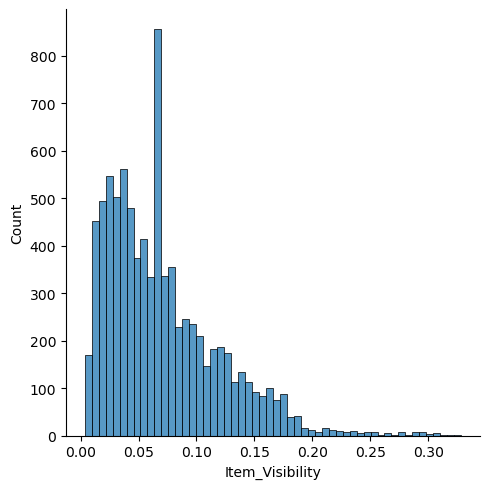

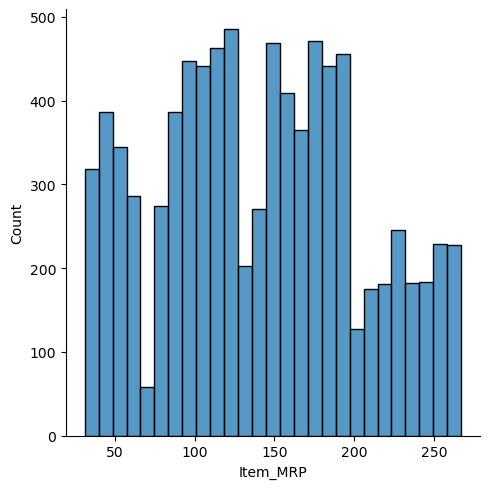

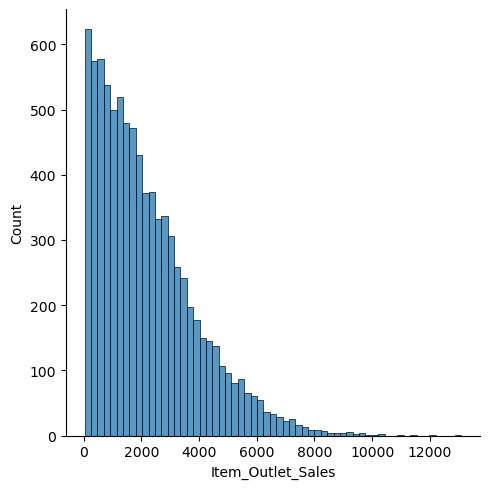

In [56]:
for col in dist_columns:
    sns.displot(data_original[col])
   

C:\Users\Admin\AppData\Local\Temp\ipykernel_9200\3212111551.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_original['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

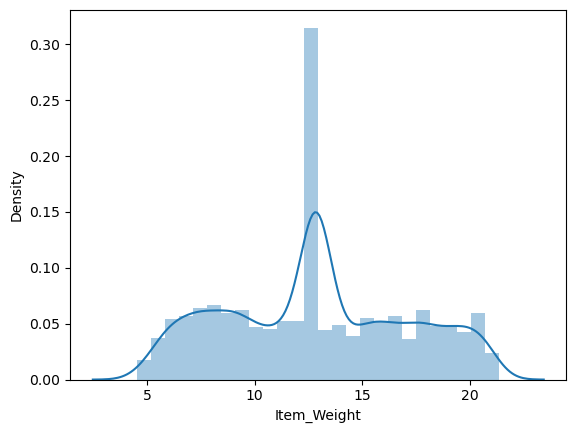

In [43]:
sns.distplot(data_original['Item_Weight'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9200\1311329503.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data_original.corr()


<Axes: >

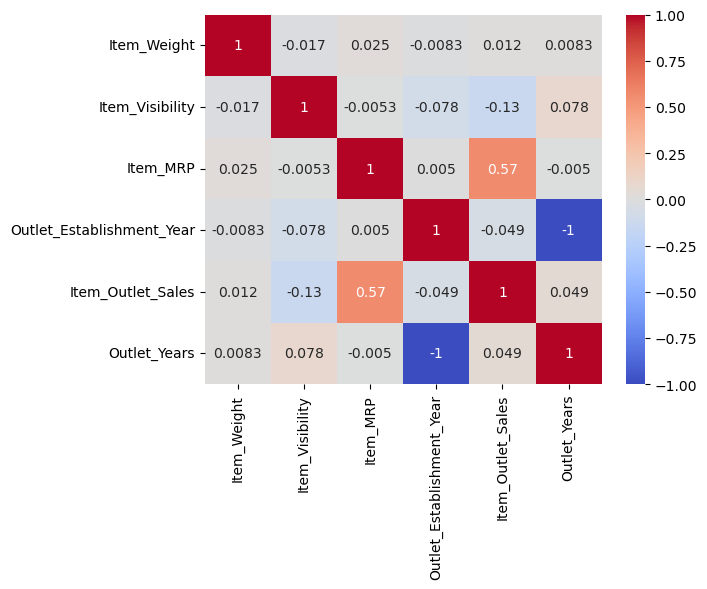

In [59]:
corr=data_original.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_original['Outlet'] = le.fit_transform(data_original['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    data_original[col] = le.fit_transform(data_original[col])

In [64]:
data_original = pd.get_dummies(data_original, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
data_original.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,25,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,15,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,25,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,732.3800,26,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,994.7052,37,1,...,0,0,1,0,1,0,0,0,0,1


In [78]:
corr2=data_original.corr()
corr_index=corr2[((corr2["Item_Outlet_Sales"]>0.1)|(corr2["Item_Outlet_Sales"]<-0.1))&(corr2["Item_Outlet_Sales"]!=1)][["Item_Outlet_Sales"]]
corr_index=corr_index.index.tolist()
corr_index

C:\Users\Admin\AppData\Local\Temp\ipykernel_9200\2806347334.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2=data_original.corr()


['Item_Visibility',
 'Item_MRP',
 'Outlet',
 'Outlet_Location_Type_0',
 'Outlet_Type_0',
 'Outlet_Type_1',
 'Outlet_Type_3']

In [89]:
x=data_original[corr_index]


In [81]:
y=data_original['Item_Outlet_Sales']

In [82]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
from sklearn.ensemble import ExtraTreesRegressor

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,mean_absolute_error

In [87]:
models=[LinearRegression(normalize=True),Ridge(normalize=True),Lasso(), DecisionTreeRegressor(),RandomForestRegressor(),ExtraTreesRegressor()]

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [99]:
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(f"r2_score:{model} -->", r2_score(y_test,pred))
    print(f"mean_squared_error:{model} -->", mean_squared_error(y_test,pred))
    print(f"mean_absolute_error:{model} -->", mean_absolute_error(y_test,pred))

r2_score:LinearRegression() --> 0.5692412915972089
mean_squared_error:LinearRegression() --> 1206552.3540907886
mean_absolute_error:LinearRegression() --> 810.551418047952
r2_score:Ridge() --> 0.5692959692758072
mean_squared_error:Ridge() --> 1206399.202266944
mean_absolute_error:Ridge() --> 810.4593179699787
r2_score:Lasso() --> 0.5697338716113135
mean_squared_error:Lasso() --> 1205172.6406595744
mean_absolute_error:Lasso() --> 809.7998011839868
r2_score:DecisionTreeRegressor() --> 0.1695018772288316
mean_squared_error:DecisionTreeRegressor() --> 2326219.866367864
mean_absolute_error:DecisionTreeRegressor() --> 1057.0667307782558
r2_score:RandomForestRegressor() --> 0.5405249560209711
mean_squared_error:RandomForestRegressor() --> 1286986.6241693702
mean_absolute_error:RandomForestRegressor() --> 782.745366662495
r2_score:ExtraTreesRegressor() --> 0.49972066331240106
mean_squared_error:ExtraTreesRegressor() --> 1401279.1839346357
mean_absolute_error:ExtraTreesRegressor() --> 821.95351